In [1]:
import scanpy as sc
import sys
sys.path.append('/wsfish/glioblastoma/')
import FISHspace as sp
import numpy as np
import squidpy as sq
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

# make font changeable in Illustrator
mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 0.2
mpl.rcParams['xtick.minor.pad'] = 0
mpl.rcParams['xtick.major.pad'] = 0
mpl.rcParams['ytick.minor.pad'] = 0
mpl.rcParams['ytick.major.pad'] = 0
mpl.rcParams['xtick.minor.width'] = 0.2
mpl.rcParams['xtick.major.width'] = 0.2
mpl.rcParams['ytick.minor.width'] = 0.2
mpl.rcParams['ytick.major.width'] = 0.2

# use colorblind seaborn style
plt.style.use('seaborn-colorblind')

2023-08-29 15:33:45.520672: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
adata = sc.read_h5ad('../DataSubmission/GBM_Linnarsson_EEL.h5ad')
#adata_tumor_sc.X = adata_tumor_sc.layers['smooth']

In [3]:
adata.obs['m-states'].cat.categories

Index(['AC-like 1', 'AC-like 2', 'AC-like 3', 'AC-like 4', 'AC-like 5',
       'AC-like 6', 'AC-like 7', 'DC', 'Endothelial 1', 'Erythrocyte 1',
       'FB-like 1', 'FB-like 2', 'FB-like 3', 'GBL-like 1', 'GBL-like 2',
       'GW-like 1', 'GW-like 2', 'GW-like 3', 'GW-like 4', 'GW-like 5',
       'GW-like 6', 'GW-like 7', 'GW-like 8', 'Mono 1', 'Mono 2',
       'Mural cell 1', 'Mural cell 2', 'OPC-like 1', 'OPC-like 2',
       'Oligodendrocyte 1', 'Oligodendrocyte 2', 'RG-like', 'TAM-BDM 1',
       'TAM-BDM 2', 'TAM-BDM 3', 'TAM-BDM 4', 'TAM-MG', 'nIPC-RG-like',
       'nIPC-like 1', 'nIPC-like 2', 'nIPC-like 3', 'preOPC-like 1',
       'unknown 1', 'unknown2 1'],
      dtype='object')

In [4]:
adata_clusters = adata[adata.obs['m-states'].isin([
    'AC-like 1', 'AC-like 2', 'AC-like 3', 'AC-like 4', 'AC-like 5','AC-like 6','AC-like 7',
    'GBL-like 1','GBL-like 2',
    'FB-like 1', 'FB-like 2', 'FB-like 3',
    'GW-like 1','GW-like 2', 'GW-like 3', 'GW-like 4', 'GW-like 5', 'GW-like 6','GW-like 7', 'GW-like 8',
    'nIPC-like 1', 'nIPC-like 2','nIPC-like 3', 
    'OPC-like 1', 'OPC-like 2', 
    'RG-like', 'nIPC-RG-like',
    'preOPC-like 1'])]
adata_clusters.raw = adata_clusters
#OPC = OPC[OPC.X.sum(axis=1) > 20]

In [5]:
row_order =[ 
    'FB-like 1', 'FB-like 2', 'FB-like 3',
    'GW-like 1', 'GW-like 2', 'GW-like 3', 'GW-like 4', 'GW-like 5', 'GW-like 6','GW-like 7', 'GW-like 8', 
    'AC-like 1', 'AC-like 2', 'AC-like 3', 'AC-like 4', 'AC-like 5', 'AC-like 6','AC-like 7',
    'nIPC-like 1','nIPC-like 2','nIPC-like 3',
    'OPC-like 2','OPC-like 1',
    'RG-like', 'nIPC-RG-like',
    'GBL-like 1', 'GBL-like 2',
    'preOPC-like 1', 
]

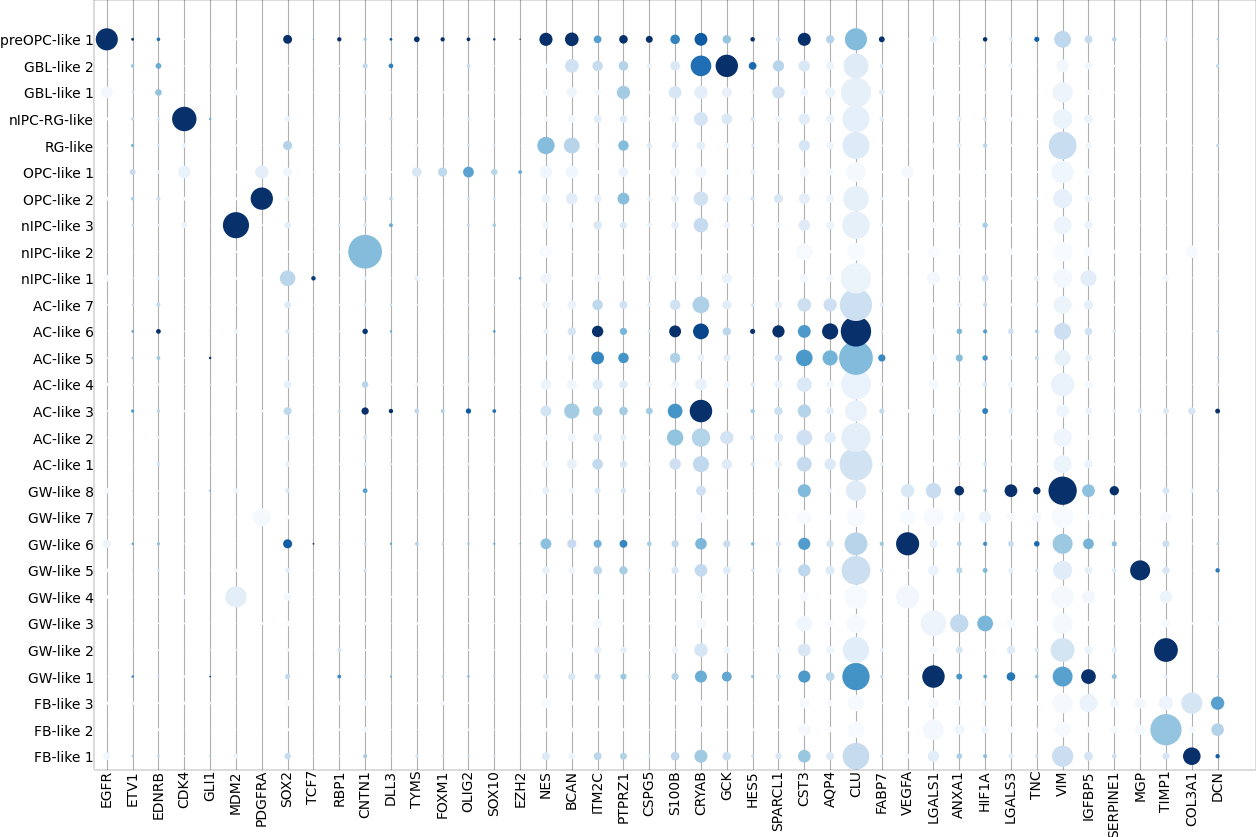

In [6]:

col_order = [
    'EGFR','ETV1','EDNRB','CDK4','GLI1','MDM2','PDGFRA',
    'SOX2','TCF7','RBP1','CNTN1','DLL3', 'TYMS', 'FOXM1', 'OLIG2','SOX10', 'EZH2', 
    'NES','BCAN','ITM2C', 'PTPRZ1', 'CSPG5', 'S100B', 'CRYAB', 'GCK', 'HES5', 'SPARCL1','CST3', 'AQP4', 'CLU','FABP7',
    'VEGFA', 'LGALS1', 'ANXA1', 'HIF1A', 'LGALS3', 'TNC', 'VIM', 'IGFBP5', 'SERPINE1', 'MGP', 'TIMP1','COL3A1','DCN',
]


markers = col_order
     
df =sp.pl.dotplot_bgval(
    adata_clusters,
    col_order,
    cluster_key='m-states',
    #minmax=True,
    min_cells=200,
    bgval=1,
    normalize_totals=False,
    minmax=False,
    size_factor=1500,
    figsize=(15,10),
    metric='correlation',
    row_order=row_order,
    col_order= col_order,
    ytick_rotation=0,
    reverse_rows=False,
    reverse_cols=False,
)